## Importing the libraries

In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

### Let's first get familiarised with the data. It is important to get the feel of the data to know what we are dealing with !

In [2]:
original_data=pd.read_csv("diabetes.csv") # This is the original dataset from kegal.

In [3]:
original_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


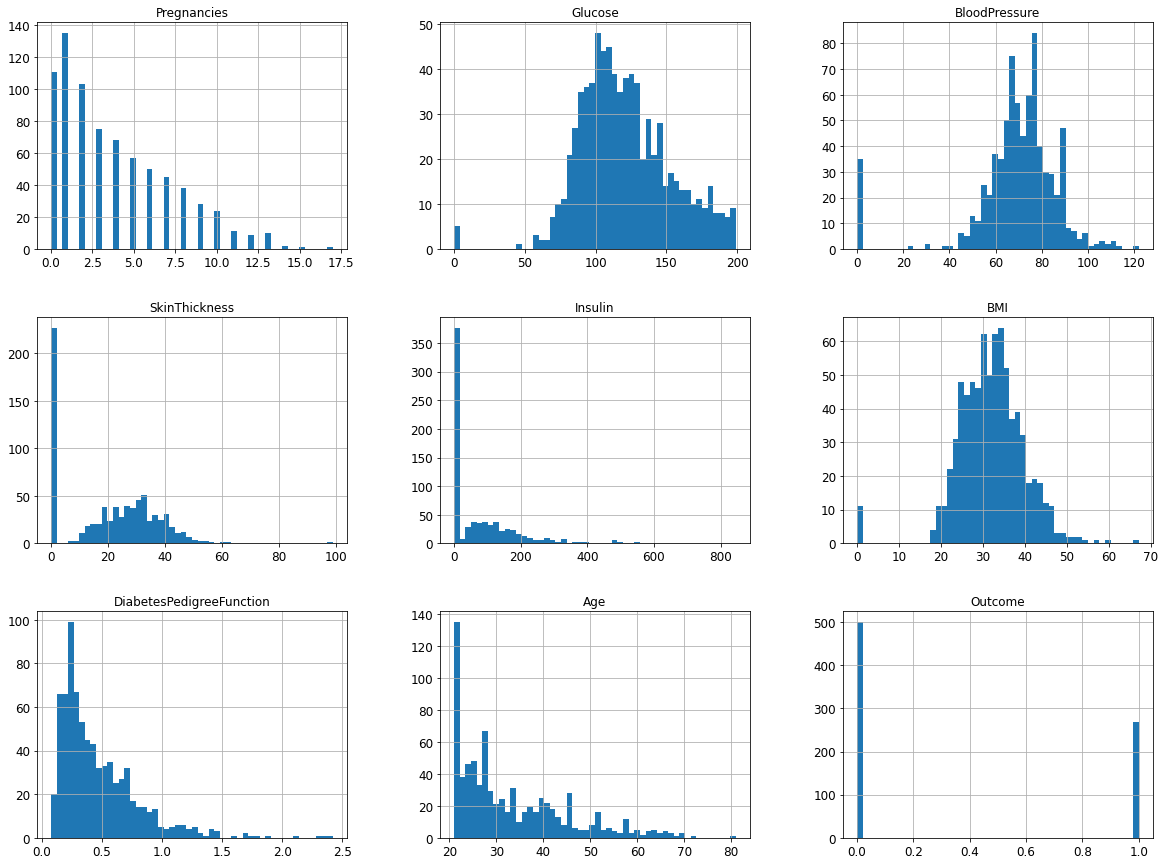

In [4]:
original_data.hist(bins=50,figsize=(20,15))
plt.show()

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
original_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                    AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Glucose                     AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
BloodPressure               AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
SkinThickness               AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Insulin                     AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
BMI                         AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
DiabetesPedigreeFunction    AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Age                         AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Outcome                           AxesSubplot(0.125,0.125;0.0824468x0.343182)
dtype: object

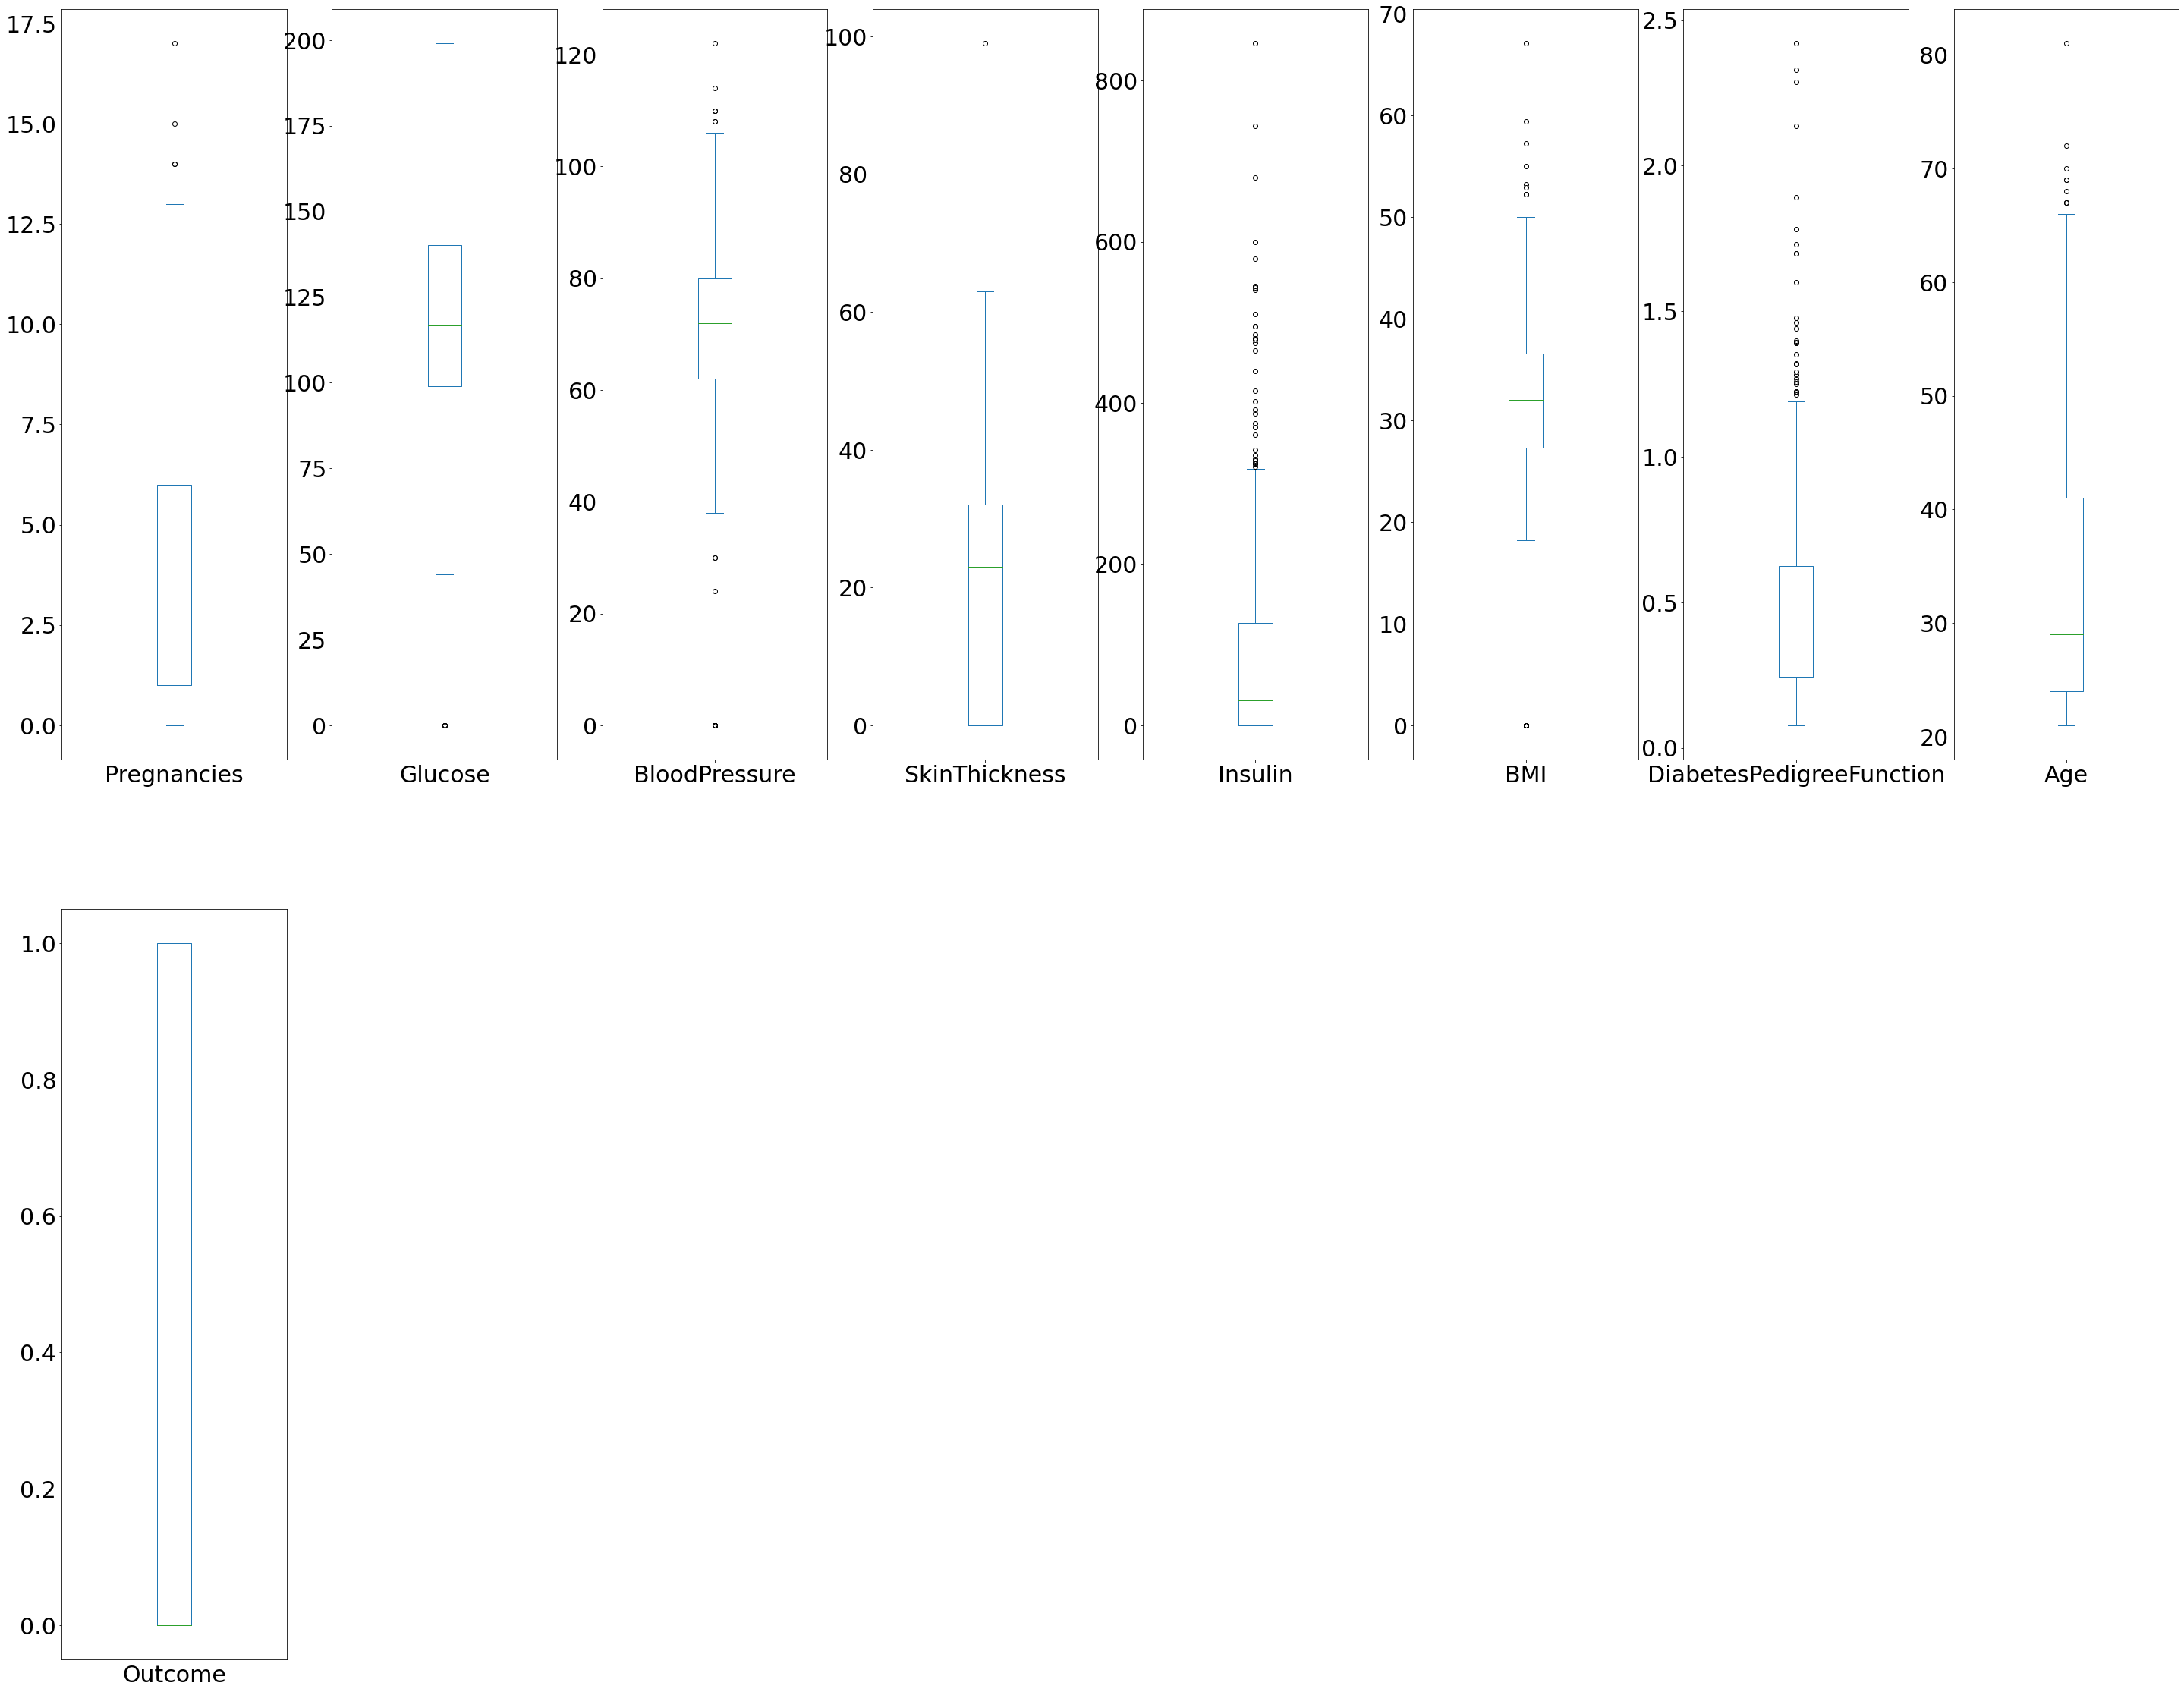

In [7]:
original_data.plot(kind="box", subplots=True,figsize=(50,40),layout=(2,8),fontsize=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

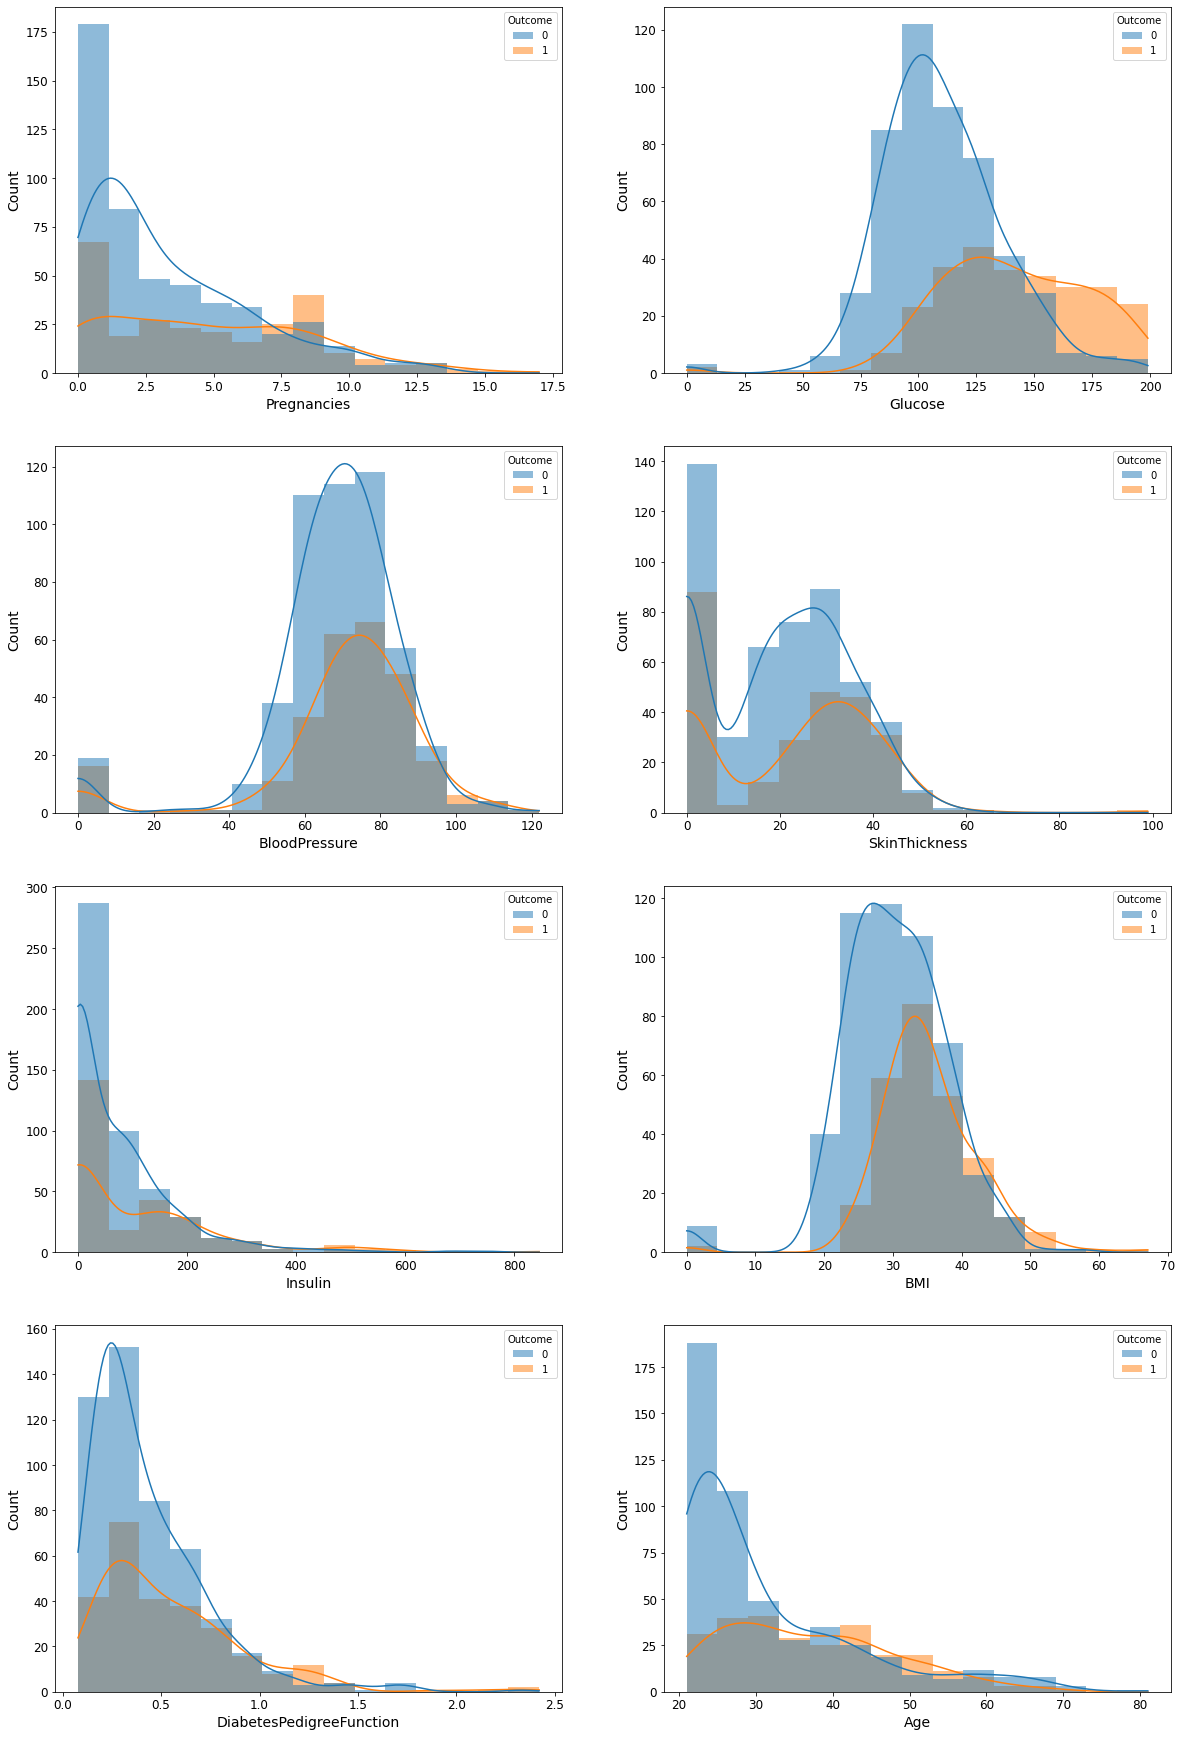

In [8]:
fig, axes = plt.subplots(4,2,figsize =(20,31))

sns.histplot(data=original_data, x=original_data.columns[0], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[0,0])
sns.histplot(data=original_data, x=original_data.columns[1], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[0,1])
sns.histplot(data=original_data, x=original_data.columns[2], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[1,0])
sns.histplot(data=original_data, x=original_data.columns[3], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[1,1])
sns.histplot(data=original_data, x=original_data.columns[4], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[2,0])
sns.histplot(data=original_data, x=original_data.columns[5], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[2,1])
sns.histplot(data=original_data, x=original_data.columns[6], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[3,0])
sns.histplot(data=original_data, x=original_data.columns[7], hue="Outcome", bins=15, kde=True, edgecolor=None,ax=axes[3,1])


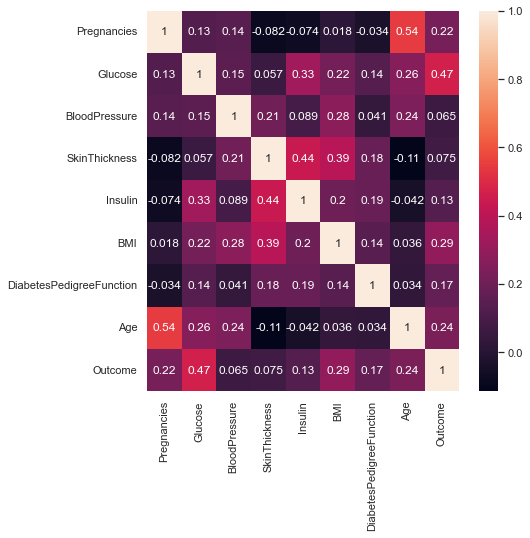

In [9]:
# Lets see correlation between the all the columns
sns.set()
plt.figure(figsize=(7,7))
p=sns.heatmap(original_data.corr(), annot=True,cmap ='rocket')

## I think now I have enough cognizance of the data. Now lets use the preprocessed data


In [10]:
from sklearn.datasets import load_svmlight_file
features,labels = load_svmlight_file('diabetes_scale')

In [11]:
df_labels=pd.DataFrame(labels)
df_labels.rename({0: 'Labels'}, axis=1, inplace=True)

In [12]:
df_features= pd.DataFrame(features.toarray())
df_features.rename({0: 'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'Diabetes_pedegree_Function',7:'Age'}, axis=1, inplace=True)

In [13]:
data = {'Bias': [1]*768
       }
df_bias = pd.DataFrame.from_dict(data) # Creating a column for Bias and having values as all 1

In [14]:
bias_and_features=[df_bias,df_features] 
df_bias_features=pd.concat(bias_and_features,axis=1)
df_bias_features.head()

,Bias,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_pedegree_Function,Age
0,1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [15]:
all_df=[df_labels,df_bias_features]
df = pd.concat(all_df, axis=1)
df.head()

,Labels,Bias,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_pedegree_Function,Age
0,-1.0,1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1.0,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1.0,1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1.0,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.0,1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [16]:
#Spliting the data into Training, Testing and Validation
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(df, test_size=0.3, random_state=42, stratify=df.iloc[:,0])

validation_data, testing_data = train_test_split(test_data, test_size=0.3, random_state=42, stratify=test_data.iloc[:,0])

In [17]:
# Creating Numpy array as it is recommended to use numpy array while working on Neural networks
training_dataset=training_data.values
validation_dataset=validation_data.values
testing_dataset=testing_data.values

In [18]:
X_train=training_dataset[:,1:] 
y_train=training_dataset[:,0]

X_val=validation_dataset[:,1:]
y_val=validation_dataset[:,0]

X_test=testing_dataset[:,1:]
y_test=testing_dataset[:,0]

In [19]:
np.random.seed(100)  # either use 43 or 0 or 100
weights= np.random.rand(9) # we use 9 because we have to include bias also
weights

array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886,
       0.12156912, 0.67074908, 0.82585276, 0.13670659])

In [20]:
def update_weights(weights, X, y, lr=0.01): #0.01
    summation=0
    for features,label in zip(X,y):
        dot=(np.dot(features,weights))*label
        if dot<0:
            dot=1
        else:
            dot=0
        summation+=label*features*dot

    weights=weights+ lr *summation
    return weights

In [21]:
def loss_function(weights,X,y):
    loss=[]
    for feature,label in zip(X,y):
        dot=label * np.dot(feature,weights)
        if dot<0:
            loss_=1
        else:
            loss_=0
        loss.append(loss_)
    return np.sum(loss)/X.shape[0]

In [22]:
def activation_and_prediction(weights,X):
    pred=np.sign(np.dot(X,weights))   # it will store the prediction in numpy.array
    return pred   # We dont need to define a list a store the result in it.

In [23]:
def accuracy_score(labels,predicted_values):
    correct_values = (labels == predicted_values)
    accuracy = correct_values.sum() / correct_values.size
    return accuracy

In [24]:
def best_weights(weights,X_train,y_train,X_val):
    all_values_list=[]
    best_weights=[]
    accuracy_list=[]
    tr_loss_list=[]
    val_loss_list=[]
    tr_acc_list=[]
    for epoch in range(20):
        weights=update_weights(weights,X_train,y_train)
        
        tr_pred=activation_and_prediction(weights,X_train)
        tr_acc=accuracy_score(y_train, tr_pred)

        val_pred = activation_and_prediction(weights,X_val)
        val_acc=accuracy_score(y_val, val_pred)
        
        tr_loss=loss_function(weights,X_train,y_train)
        val_loss=loss_function(weights,X_val,y_val)

        t=(val_acc,weights,tr_loss,val_loss)
        
        all_values_list.append(t)
        
        accuracy_list.append(val_acc)
        best_weights.append(weights)
        tr_loss_list.append(tr_loss)
        val_loss_list.append(val_loss)
        tr_acc_list.append(tr_acc)
        
    return all_values_list ,accuracy_list, best_weights, tr_loss_list, val_loss_list, tr_acc_list

In [25]:
all_values=best_weights(weights,X_train,y_train,X_val)[0]

val_acc=best_weights(weights,X_train,y_train,X_val)[1]
acquired_best_weights=best_weights(weights,X_train,y_train,X_val)[2]
train_loss=best_weights(weights,X_train,y_train,X_val)[3]
val_loss=best_weights(weights,X_train,y_train,X_val)[4]
training_accuracy=best_weights(weights,X_train,y_train,X_val)[5]

In [26]:
print("Respective values obtained on the 20th epoch\n")

print("Validation Accuracy",val_acc[-1])
print("Training Accuracy",training_accuracy[-1])

Respective values obtained on the 20th epoch

Validation Accuracy 0.7204968944099379
Training Accuracy 0.7616387337057728


In [48]:
def plot(training_accuracy,val_acc,train_loss,val_loss):
    
    plt.figure(figsize=[15,5])
    plt.plot(val_acc, linestyle='-',label="validation_Accuracy")
    plt.plot(training_accuracy,label="Training Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,20,1))
    plt.yticks(np.arange(0.3,0.9,0.1))
    plt.legend(loc='upper right')
    plt.show()
    
    
    plt.figure(figsize=[15,5])    
    plt.plot(val_loss, linestyle='-',label="Validation_loss")
    plt.plot(train_loss,label="Training_loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel('Loss')
    plt.xticks(np.arange(1,20,1))
    plt.yticks(np.arange(0.2,0.7,0.1))
    plt.legend(loc='upper right')
    plt.show()

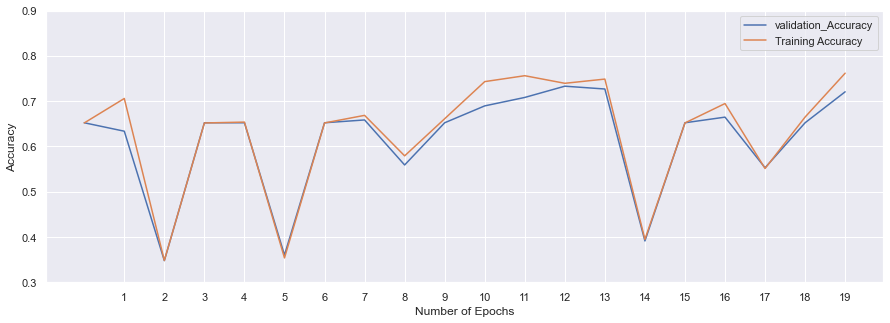

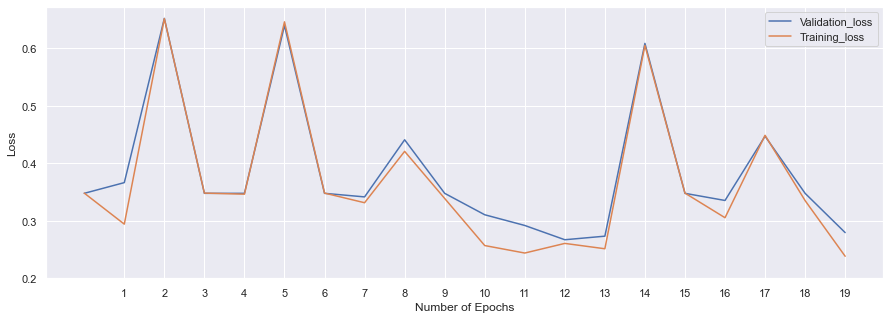

In [49]:
plot(training_accuracy,val_acc,train_loss,val_loss)

In [29]:
def best_accuracy_and_weights(all_values_list):

    best_value=all_values_list[0][0]
    for i in range(1, len(all_values_list)):
        if best_value< all_values_list[i][0]:
            best_value=all_values_list[i][0]
        else:
            pass
    
    for i in range(len(all_values_list)):
        if all_values_list[i][0]==best_value:
            return(all_values_list[i][0],all_values_list[i][1])

In [30]:
best_value=best_accuracy_and_weights(all_values)
best_weights_acquired=best_accuracy_and_weights(all_values)[1]

print("Validation Set")
print("Best Accuracy on valiadation set: ",round(best_value[0]*100,2),"%")
print("Weights for the above given accuracy are: ",best_weights_acquired)

Validation Set
Best Accuracy on valiadation set:  73.29 %
Weights for the above given accuracy are:  [-0.61659506 -0.76398377 -3.40261765  0.37330042 -0.53265608  0.11376679
 -1.23252969 -0.30611175 -0.71462712]


In [56]:
# Now lets use the acquired best results on the test_data
pred_test=activation_and_prediction(best_weights_acquired,X_test)
test_accuracy=accuracy_score(y_test,pred_test)
print("Test Accuracy on the best weights attained on validation set is: ",round(test_accuracy*100,2),"%")

Test Accuracy on the best weights attained on validation set is:  74.29 %


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

        -1.0       0.61      0.80      0.69        25
         1.0       0.86      0.71      0.78        45

    accuracy                           0.74        70
   macro avg       0.74      0.76      0.74        70
weighted avg       0.77      0.74      0.75        70



In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_test)

array([[20,  5],
       [13, 32]])

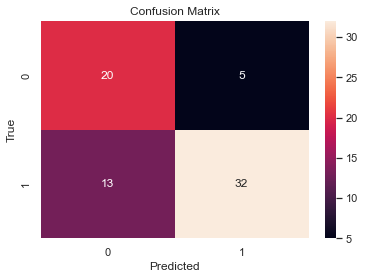

In [63]:
cmat = confusion_matrix(y_test,pred_test)
sns.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [85]:
# False negative
print('From the confusion matrix above we see that the percentage of False Negatives is ',
      round(13/(20+5+13+32),2),"%")

From the confusion matrix above we see that the percentage of False Negatives is  0.19 %


## Using Sklearn

In [32]:
df2=[df_labels,df_features] 
df2_new=pd.concat(df2,axis=1)
df2_new.head()

,Labels,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_pedegree_Function,Age
0,-1.0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1.0,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1.0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1.0,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [65]:
train_df2, test_df2 = train_test_split(df2_new, test_size=0.3, random_state=42, stratify=df.iloc[:,0])

In [66]:
X_df2_tr=train_df2.iloc[:,1:].values
y_df2_tr=train_df2.iloc[:,0].values

X_df2_test=test_df2.iloc[:,1:].values
y_df2_test=test_df2.iloc[:,0].values

In [67]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [68]:
clf_model = Perceptron(tol=1e-3, random_state=42) # because we are using eta0=0.01 in our model which we created above
clf_model.fit(X_df2_tr, y_df2_tr)

Perceptron(random_state=42)

In [69]:
print("The best bias or the intercept is:",clf_model.intercept_)

The best bias or the intercept is: [0.]


In [70]:
print('The best weights acquired are: ',clf_model.coef_)

The best weights acquired are:  [[-1.1764765  -2.41203892  2.8524624   0.1009754   1.2221832  -0.935922
  -2.4227517   0.3999844 ]]


In [71]:
pred_test=clf_model.predict(X_df2_test)

In [81]:
accuracy_score(y_df2_test,pred_test)

0.6926406926406926

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_df2_test,pred_test)

array([[ 31,  50],
       [ 21, 129]])

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_df2_test,pred_test))

              precision    recall  f1-score   support

        -1.0       0.60      0.38      0.47        81
         1.0       0.72      0.86      0.78       150

    accuracy                           0.69       231
   macro avg       0.66      0.62      0.63       231
weighted avg       0.68      0.69      0.67       231



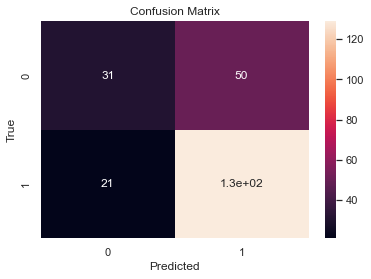

In [75]:
cmat = confusion_matrix(y_df2_test,pred_test)
sns.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [92]:
# False negative
print('From the confusion matrix above we see that the percentage of False Negatives is ',
     round(21/(1.3e+02+21+50+31),2),"%")

From the confusion matrix above we see that the percentage of False Negatives is  0.09 %
